In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import copy
import os 
import scipy

import sys; sys.path.append("./scripts/")
from utils_ import load_data

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


def sns_styleset():
    sns.set_context('paper')
    sns.set_style('ticks')
    matplotlib.rcParams['axes.linewidth']    = .75
    matplotlib.rcParams['xtick.major.width'] = .75
    matplotlib.rcParams['ytick.major.width'] = .75
    matplotlib.rcParams['xtick.major.size'] = 3
    matplotlib.rcParams['ytick.major.size'] = 3
    matplotlib.rcParams['font.size']       = 7
    matplotlib.rcParams['axes.titlesize']  = 7
    matplotlib.rcParams['axes.labelsize']  = 7
    matplotlib.rcParams['legend.fontsize'] = 7
    matplotlib.rcParams['xtick.labelsize'] = 7
    matplotlib.rcParams['ytick.labelsize'] = 7
    
sns_styleset()

In [2]:
restriction_v1 = ["MC","BC", "SC", "DBC", "BPC", "HEC", "NFG"]

In [7]:
morph = pd.read_csv('./data/morphometric_statistic_full.csv')

morph = morph[morph['type'] != 'SOM L4 S1']
morph.loc[morph['type'] == 'NFC','type'] = 'NGC'

morph = morph[['type','name','branch_points', 'depth', 'height', 'max_branch_angle', 'max_branch_order', 'max_path_angle',
                           'max_path_dist_to_soma', 'max_segment_length', 'max_tortuosity', 'mean_branch_angle',
                           'mean_path_angle', 'mean_tortuosity',
                           'stems', 'tips', 'total_length', 'width']]

y = morph['type'].values

In [8]:
for column in morph.columns:
    morph = morph.rename(columns={column : column.replace("_", " ").capitalize()})

morph = morph.rename(columns={"Max path dist to soma": "Max neurite length"})

for column in morph.columns:
    if column in ['Depth', 'Height','Max neurite length','Max segment length', 'Total length', 'Width']:
        morph = morph.rename(columns={column : column + ' (μm)'})
    if column in ['Max branch angle','Mean branch angle','Max path angle', 'Mean path angle']:
        morph = morph.rename(columns={column : column + ' (°)'})

<IPython.core.display.Javascript object>


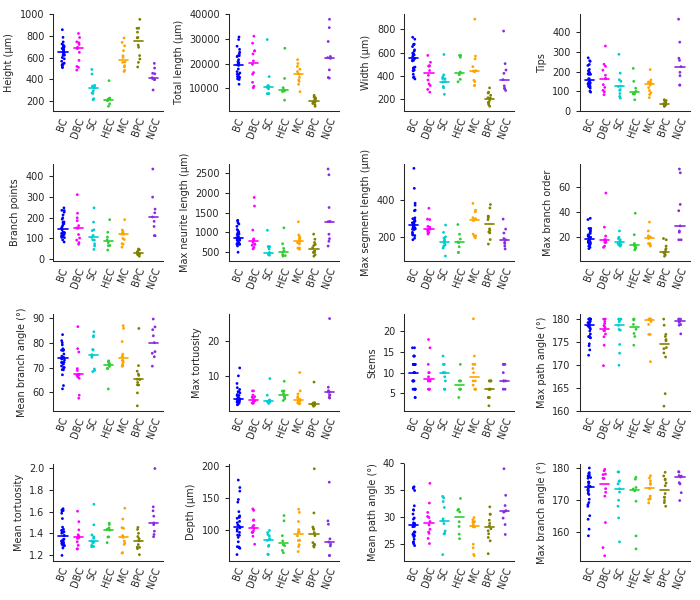

In [9]:
X = morph.values[:,2:].astype(float)

fig, axes = plt.subplots(4, 4, figsize = (7, 6))

order = ['BC', 'DBC', 'SC', 'HEC', 'MC', 'BPC', 'NGC']
colors = {'BPC':'#808000', 'MC':'#fea400', 'DBC':'#fe00fe', 'HEC':'#32cc32',
          'SC':'#00cdd0', 'PYR':'#000000', 'BC':'#0000fe', 'NGC':'#892be1'}

KW = []
for f in range(X.shape[1]):
    KW.append(scipy.stats.kruskal(X[y=='DBC',f], X[y=='HEC',f], X[y=='SC',f],
                    X[y=='BC',f], X[y=='MC',f], X[y=='BPC',f], X[y=='NGC',f]).statistic)
featureorder = np.argsort(KW)[::-1]

for feature, axis in zip(morph.columns[2:][featureorder], axes.reshape(-1)):
    sns.stripplot(x = 'Type', y = feature, data = morph, palette = colors,
                  jitter = True, ax = axis, s = 2, order = order, zorder=0)
    axis.set_xlabel('')
    axis.tick_params(axis='x', which='both', length=0, rotation = 70)
    
    for i, celltype in enumerate(order):
        m = np.median(morph[feature][y==celltype])
        axis.plot([i-.3,i+.3], [m,m], 'k', zorder=1, color=colors[celltype])

sns.despine()
plt.tight_layout()

plt.savefig('../figures/morphometrics.png', dpi=200)
plt.savefig('../figures/morphometrics.pdf', dpi=200)